In [1]:
import io
import random
import string
import warnings
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Veri Görselleştirme
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.style as style
from matplotlib import ticker
import seaborn as sns
import pickle
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from collections import Counter

# python kütüphaneleri
import re
import json
import os
from collections import Counter
import datetime as dt

1.Temizlenmiş Verinin Yüklenmesi

In [2]:
data=pd.read_csv("D:/ayhanSelimSoftwareOrganization/data/allCleanData.csv")
clean_data=data[["category","date","clean_text","subreddit"]]
clean_data.sample(5)

,category,date,clean_text,subreddit
393562,vaccine,26/06/2021,people who blindly defend countries and leader...,vaxxhappened
477323,vaccine,29/08/2021,i would anyone want to travel to another count...,vaxxhappened
404922,vaccine,13/06/2021,no shit all anxiety based im certainly not goi...,CovidVaccinated
104319,vaccine,10/04/2020,same i am a christian too its so dumb,vaxxhappened
355501,vaccine,01/05/2021,day any help for these headaches,CovidVaccinated


2.Sentiment Etiketlenmiş Veri ile ilgili Analizler

In [4]:
data=pd.read_csv("D:/ayhanSelimSoftwareOrganization/data/allSentimentVaderData.csv", sep=";")
sentiment_data=data[["category","date","clean_text","subreddit","sentiment_score","sentiment"]]
sentiment_data.sample(5)

,category,date,clean_text,subreddit,sentiment_score,sentiment
54749,vaccine,03/02/2020,ok but if you trust a surgeon to with a broken...,DebateVaccines,-0.3925,negative
430471,vaccine,01/06/2021,i would really like to know the answer to this...,CovidVaccinated,0.8166,positive
416429,vaccine,27/06/2021,mine have been swollen for like months,CovidVaccinated,0.3612,positive
235690,vaccine,01/10/2020,there are only two words you will ever need fo...,VACCINES,0.7184,positive
323675,vaccine,04/03/2021,benzos are safe with the vaccine im a nurse wh...,CovidVaccinated,0.8074,positive


In [5]:
sentiment_labels=sentiment_data.groupby(['sentiment']).size().reset_index(name='sentiment_count')
sentiment_labels

,sentiment,sentiment_count
0,negative,233825
1,neutral,124214
2,positive,253076


In [6]:
sentiment_labels["sentiment_percentage"]=sentiment_labels["sentiment_count"].apply(lambda x: round(x/sentiment_data.shape[0],4)*100)
sentiment_labels

,sentiment,sentiment_count,sentiment_percentage
0,negative,233825,38.26
1,neutral,124214,20.32
2,positive,253076,41.41


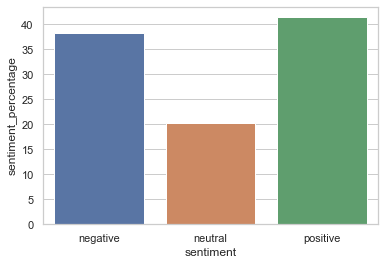

In [7]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="sentiment", y="sentiment_percentage", data=sentiment_labels)

3.Emotion Etiketlenmiş Veri ile ilgili Analizler

In [8]:
emotion_data=pd.read_csv("D:/ayhanSelimSoftwareOrganization/data/allEmotionsparkNLPData.csv")
emotion_data.sample(5)

,id,date,text,emotion
324347,gqcfmi1,09/03/2021,yes both taken daily as usual,joy
42821,fhx8mls,17/02/2020,me too i love it,surprise
526637,he2alz3,24/09/2021,i dont think he can as i am sure his new book ...,fear
118756,fmfpcgg,04/04/2020,measles measles is a highly contagious infecti...,fear
151893,fqoyvbt,15/05/2020,do you have any source for you claims about th...,fear


In [9]:
emotion_labels=emotion_data.groupby(['emotion']).size().reset_index(name='emotion_count')
emotion_labels

,emotion,emotion_count
0,fear,318058
1,joy,104817
2,sadness,92509
3,surprise,95410


In [10]:
emotion_labels["emotion_percentage"]=emotion_labels["emotion_count"].apply(lambda x: round(x/emotion_data.shape[0],4)*100)
emotion_labels

,emotion,emotion_count,emotion_percentage
0,fear,318058,52.07
1,joy,104817,17.16
2,sadness,92509,15.15
3,surprise,95410,15.62


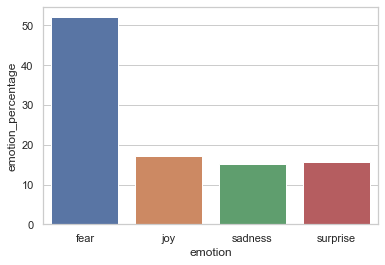

In [11]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="emotion", y="emotion_percentage", data=emotion_labels)

4. 3 Sınıflı Duygulara ilişkin Aşı ve Aşı Markaları Analizi

In [14]:
sentiment_data.dropna(subset=["clean_text"],inplace=True)
sentiment_data["clean_text"].isnull().sum()

0

In [15]:
vaccine=sentiment_data[sentiment_data["clean_text"].str.contains("vaccine|Vaccine|covid19 vaccine")]
pfizer_biontech=sentiment_data[sentiment_data["clean_text"].str.contains("pfizer|biontech|Pfizer|Biontech")]
sinovac_coronavac=sentiment_data[sentiment_data["clean_text"].str.contains("sinovac|coronavac|Sinovac|Coronavac")]
moderna=sentiment_data[sentiment_data["clean_text"].str.contains("moderna|Moderna")]
astrazeneca=sentiment_data[sentiment_data["clean_text"].str.contains("astrazeneca|Astrazeneca")]
sputnik_V=sentiment_data[sentiment_data["clean_text"].str.contains("sputnik_V|Sputnik_V|sputnik")]

In [16]:
vaccine_list=[len(vaccine),len(pfizer_biontech),len(sinovac_coronavac),len(moderna),len(astrazeneca),len(sputnik_V)]
vaccine_numbers=pd.DataFrame(vaccine_list,index=["vaccine","pfizer_biontech","coronavac","moderna","astrazeneca","sputnik_V"],columns=["comment_count"])
vaccine_numbers

,comment_count
vaccine,113120
pfizer_biontech,14432
coronavac,207
moderna,9524
astrazeneca,855
sputnik_V,135


In [19]:
vaccine_size=vaccine.groupby(['sentiment']).size().reset_index(name='comment_count')
pfizer_biontech_size=pfizer_biontech.groupby(['sentiment']).size().reset_index(name='comment_count')
sinovac_coronavac_size=sinovac_coronavac.groupby(['sentiment']).size().reset_index(name='comment_count')
moderna_size=moderna.groupby(['sentiment']).size().reset_index(name='comment_count')
astrazeneca_size=astrazeneca.groupby(['sentiment']).size().reset_index(name='comment_count')
sputnik_size=sputnik_V.groupby(['sentiment']).size().reset_index(name='comment_count')

In [20]:
vaccine_size['comment_percentage'] = vaccine_size['comment_count'].apply(lambda x: round(x / vaccine.shape[0],4) * 100)
vaccine_size

,sentiment,comment_count,comment_percentage
0,negative,52725,46.61
1,neutral,10638,9.40
2,positive,49754,43.98


Text(0, 0.5, 'Aşı Kavramı ile ile ilgili Duygu Yüzdeleri')

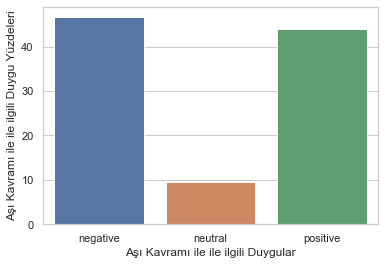

In [41]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="sentiment", y="comment_percentage", data=vaccine_size)
ax.set_xlabel("Aşı Kavramı ile ile ilgili Duygular")
ax.set_ylabel("Aşı Kavramı ile ile ilgili Duygu Yüzdeleri")

In [26]:
pfizer_biontech_size['comment_percentage'] = pfizer_biontech_size['comment_count'].apply(lambda x: round(x / pfizer_biontech.shape[0],4) * 100)
pfizer_biontech_size

,sentiment,comment_count,comment_percentage
0,negative,5824,40.35
1,neutral,1533,10.62
2,positive,7075,49.02


Text(0, 0.5, 'Biontech Aşısı ile ilgili Duygu Yüzdeleri')

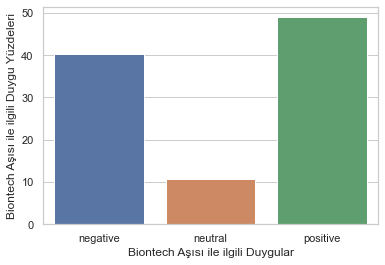

In [42]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="sentiment", y="comment_percentage", data=pfizer_biontech_size)
ax.set_xlabel("Biontech Aşısı ile ilgili Duygular")
ax.set_ylabel("Biontech Aşısı ile ilgili Duygu Yüzdeleri")

In [28]:
sinovac_coronavac_size['comment_percentage'] = sinovac_coronavac_size['comment_count'].apply(lambda x: round(x / sinovac_coronavac.shape[0],4) * 100)
sinovac_coronavac_size

,sentiment,comment_count,comment_percentage
0,negative,73,35.27
1,neutral,29,14.01
2,positive,105,50.72


Text(0, 0.5, 'Sinovac Aşısı ile ilgili Duygu Yüzdeleri')

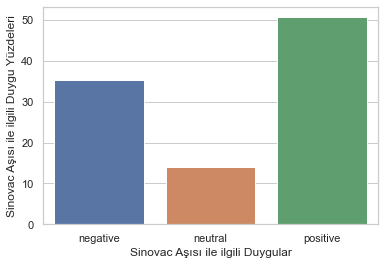

In [43]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="sentiment", y="comment_percentage", data=sinovac_coronavac_size)
ax.set_xlabel("Sinovac Aşısı ile ilgili Duygular")
ax.set_ylabel("Sinovac Aşısı ile ilgili Duygu Yüzdeleri")

In [31]:
moderna_size['comment_percentage'] = moderna_size['comment_count'].apply(lambda x: round(x / moderna.shape[0],4) * 100)
moderna_size

,sentiment,comment_count,comment_percentage
0,negative,3788,39.77
1,neutral,1029,10.80
2,positive,4707,49.42


Text(0, 0.5, 'Moderna Aşısı ile ilgili Duygu Yüzdeleri')

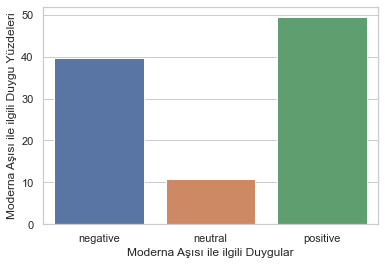

In [40]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="sentiment", y="comment_percentage", data=moderna_size)
ax.set_xlabel("Moderna Aşısı ile ilgili Duygular")
ax.set_ylabel("Moderna Aşısı ile ilgili Duygu Yüzdeleri")

5. 4 Sınıflı Duygulara ilişkin Aşı ve Aşı Markaları Analizi

In [48]:
emotion_data.dropna(subset=["text"],inplace=True)
emotion_data["text"].isnull().sum()

0

In [49]:
vaccine=emotion_data[emotion_data["text"].str.contains("vaccine|Vaccine|covid19 vaccine")]
pfizer_biontech=emotion_data[emotion_data["text"].str.contains("pfizer|biontech|Pfizer|Biontech")]
sinovac_coronavac=emotion_data[emotion_data["text"].str.contains("sinovac|coronavac|Sinovac|Coronavac")]
moderna=emotion_data[emotion_data["text"].str.contains("moderna|Moderna")]
astrazeneca=emotion_data[emotion_data["text"].str.contains("astrazeneca|Astrazeneca")]
sputnik_V=emotion_data[emotion_data["text"].str.contains("sputnik_V|Sputnik_V|sputnik")]

In [50]:
vaccine_list=[len(vaccine),len(pfizer_biontech),len(sinovac_coronavac),len(moderna),len(astrazeneca),len(sputnik_V)]
vaccine_numbers=pd.DataFrame(vaccine_list,index=["vaccine","pfizer_biontech","coronavac","moderna","astrazeneca","sputnik_V"],columns=["comment_count"])
vaccine_numbers

,comment_count
vaccine,113119
pfizer_biontech,14432
coronavac,207
moderna,9524
astrazeneca,855
sputnik_V,135


In [51]:
vaccine_size=vaccine.groupby(['emotion']).size().reset_index(name='comment_count')
pfizer_biontech_size=pfizer_biontech.groupby(['emotion']).size().reset_index(name='comment_count')
sinovac_coronavac_size=sinovac_coronavac.groupby(['emotion']).size().reset_index(name='comment_count')
moderna_size=moderna.groupby(['emotion']).size().reset_index(name='comment_count')
astrazeneca_size=astrazeneca.groupby(['emotion']).size().reset_index(name='comment_count')
sputnik_size=sputnik_V.groupby(['emotion']).size().reset_index(name='comment_count')

In [52]:
vaccine_size['comment_percentage'] = vaccine_size['comment_count'].apply(lambda x: round(x / vaccine.shape[0],4) * 100)
vaccine_size

,emotion,comment_count,comment_percentage
0,fear,91936,81.27
1,joy,12350,10.92
2,sadness,3765,3.33
3,surprise,5065,4.48


Text(0, 0.5, 'Aşı Kavramı ile ile ilgili Duygu Yüzdeleri')

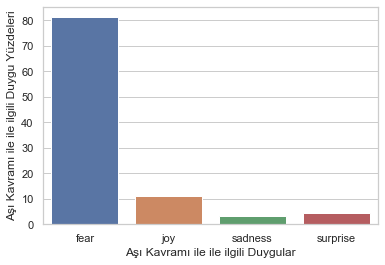

In [53]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="emotion", y="comment_percentage", data=vaccine_size)
ax.set_xlabel("Aşı Kavramı ile ile ilgili Duygular")
ax.set_ylabel("Aşı Kavramı ile ile ilgili Duygu Yüzdeleri")

In [54]:
pfizer_biontech_size['comment_percentage'] = pfizer_biontech_size['comment_count'].apply(lambda x: round(x / pfizer_biontech.shape[0],4) * 100)
pfizer_biontech_size

,emotion,comment_count,comment_percentage
0,fear,8433,58.43
1,joy,4939,34.22
2,sadness,191,1.32
3,surprise,869,6.02


Text(0, 0.5, 'Biontech Aşısı ile ilgili Duygu Yüzdeleri')

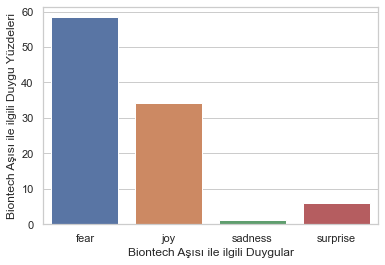

In [55]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="emotion", y="comment_percentage", data=pfizer_biontech_size)
ax.set_xlabel("Biontech Aşısı ile ilgili Duygular")
ax.set_ylabel("Biontech Aşısı ile ilgili Duygu Yüzdeleri")

In [56]:
sinovac_coronavac_size['comment_percentage'] = sinovac_coronavac_size['comment_count'].apply(lambda x: round(x / sinovac_coronavac.shape[0],4) * 100)
sinovac_coronavac_size

,emotion,comment_count,comment_percentage
0,fear,162,78.26
1,joy,28,13.53
2,sadness,8,3.86
3,surprise,9,4.35


Text(0, 0.5, 'Sinovac Aşısı ile ilgili Duygu Yüzdeleri')

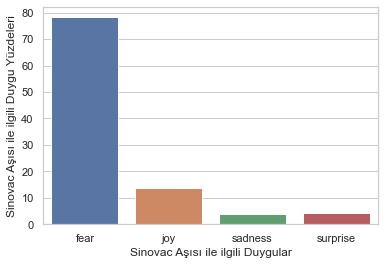

In [57]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="emotion", y="comment_percentage", data=sinovac_coronavac_size)
ax.set_xlabel("Sinovac Aşısı ile ilgili Duygular")
ax.set_ylabel("Sinovac Aşısı ile ilgili Duygu Yüzdeleri")

In [58]:
moderna_size['comment_percentage'] = moderna_size['comment_count'].apply(lambda x: round(x / moderna.shape[0],4) * 100)
moderna_size

,emotion,comment_count,comment_percentage
0,fear,4673,49.07
1,joy,3791,39.80
2,sadness,436,4.58
3,surprise,624,6.55


Text(0, 0.5, 'Moderna Aşısı ile ilgili Duygu Yüzdeleri')

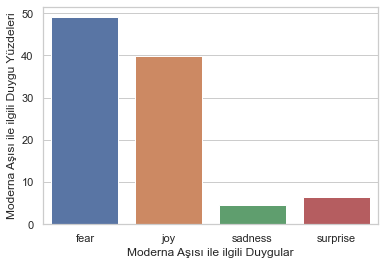

In [60]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="emotion", y="comment_percentage", data=moderna_size)
ax.set_xlabel("Moderna Aşısı ile ilgili Duygular")
ax.set_ylabel("Moderna Aşısı ile ilgili Duygu Yüzdeleri")

In [79]:
import dataframe_image as dfi

sentiment2020 = ['negative', 'neutral','positive'] 
  
# Defining columns for the dataframe 
months = ['Ocak','Şubat','Mart','Nisan','Mayıs','Haziran','Temmuz','Ağustos','Eylül','Ekim','Kasım','Aralık']
  

df = pd.DataFrame([[39.0,24.0,37.0],
                   [40.0,23.0,37.0],
                   [39.0,23.0,38.0],
                   [39.0,25.0,36.0],
                   [39.0,24.0,37.0],
                   [39.0,24.0,37.0],
                   [38.0,24.0,38.0],
                   [39.0,24.0,37.0],
                   [40.0,23.0,37.0],
                   [38.0,23.0,39.0],
                   [39.0,22.0,39.0],
                   [40.0,22.0,38.0],
                   ],columns = sentiment2020, index = months) 
  
df_styled=df.style.background_gradient(cmap ='viridis').set_properties(**{'font-size': '16px'}) 
dfi.export(df_styled,"D:/ayhanSelimSoftwareOrganization/ayhanTezRaporu/şekiller/sent_yillik_2020.png")
df_styled

,negative,neutral,positive
Ocak,39.000000,24.000000,37.000000
Şubat,40.000000,23.000000,37.000000
Mart,39.000000,23.000000,38.000000
Nisan,39.000000,25.000000,36.000000
Mayıs,39.000000,24.000000,37.000000
Haziran,39.000000,24.000000,37.000000
Temmuz,38.000000,24.000000,38.000000
Ağustos,39.000000,24.000000,37.000000
Eylül,40.000000,23.000000,37.000000
Ekim,38.000000,23.000000,39.000000


In [80]:

# Defining columns for the dataframe 
sentiment2021 = ['negative', 'neutral','positive'] 
months = ['Ocak','Şubat','Mart','Nisan','Mayıs','Haziran','Temmuz','Ağustos','Eylül','Ekim','Kasım','Aralık']
  

df = pd.DataFrame([[37.0,22.0,41.0],
                   [38.0,20.0,42.0],
                   [38.0,21.0,41.0],
                   [36.0,20.0,44.0],
                   [35.0,22.0,43.0],
                   [36.0,19.0,45.0],
                   [34.0,20.0,46.0],
                   [33.0,19.0,48.0],
                   [34.0,19.0,47.0],
                   [32.0,20.0,48.0],
                   [34.0,18.0,48.0],
                   [33.0,18.0,49.0],
                   ],columns = sentiment2021, index = months) 
  
df_styled=df.style.background_gradient(cmap ='viridis').set_properties(**{'font-size': '16px'}) 
dfi.export(df_styled,"D:/ayhanSelimSoftwareOrganization/ayhanTezRaporu/şekiller/sent_yillik_2021.png")
df_styled

,negative,neutral,positive
Ocak,37.000000,22.000000,41.000000
Şubat,38.000000,20.000000,42.000000
Mart,38.000000,21.000000,41.000000
Nisan,36.000000,20.000000,44.000000
Mayıs,35.000000,22.000000,43.000000
Haziran,36.000000,19.000000,45.000000
Temmuz,34.000000,20.000000,46.000000
Ağustos,33.000000,19.000000,48.000000
Eylül,34.000000,19.000000,47.000000
Ekim,32.000000,20.000000,48.000000


In [81]:

# Defining columns for the dataframe 
emotion2020 = ['fear', 'joy','sadness','surprise'] 
months = ['Ocak','Şubat','Mart','Nisan','Mayıs','Haziran','Temmuz','Ağustos','Eylül','Ekim','Kasım','Aralık']
  

df = pd.DataFrame([[50.0,13.0,19.0,18.0],
                   [51.0,13.0,19.0,17.0],
                   [52.0,13.0,18.0,17.0],
                   [53.0,11.0,18.0,17.0],
                   [52.0,11.0,19.0,18.0],
                   [50.0,12.0,19.0,18.0],
                   [52.0,12.0,19.0,18.0],
                   [52.0,12.0,18.0,18.0],
                   [51.0,13.0,17.0,18.0],
                   [48.0,16.0,17.0,19.0],
                   [55.0,13.0,16.0,16.0],
                   [56.0,12.0,15.0,16.0],
                   ],columns = emotion2020, index = months) 
  
df_styled=df.style.background_gradient(cmap ='viridis').set_properties(**{'font-size': '16px'}) 
dfi.export(df_styled,"D:/ayhanSelimSoftwareOrganization/ayhanTezRaporu/şekiller/emo_yillik_2020.png")
df_styled

,fear,joy,sadness,surprise
Ocak,50.000000,13.000000,19.000000,18.000000
Şubat,51.000000,13.000000,19.000000,17.000000
Mart,52.000000,13.000000,18.000000,17.000000
Nisan,53.000000,11.000000,18.000000,17.000000
Mayıs,52.000000,11.000000,19.000000,18.000000
Haziran,50.000000,12.000000,19.000000,18.000000
Temmuz,52.000000,12.000000,19.000000,18.000000
Ağustos,52.000000,12.000000,18.000000,18.000000
Eylül,51.000000,13.000000,17.000000,18.000000
Ekim,48.000000,16.000000,17.000000,19.000000


In [82]:

# Defining columns for the dataframe 
emotion2021 = ['fear', 'joy','sadness','surprise'] 
months = ['Ocak','Şubat','Mart','Nisan','Mayıs','Haziran','Temmuz','Ağustos','Eylül','Ekim','Kasım','Aralık']
  

df = pd.DataFrame([[48.0,16.0,18.0,18.0],
                   [48.0,18.0,18.0,16.0],
                   [47.0,16.0,16.0,19.0],
                   [48.0,19.0,17.0,16.0],
                   [46.0,15.0,17.0,22.0],
                   [46.0,18.0,15.0,21.0],
                   [45.0,17.0,15.0,22.0],
                   [47.0,17.0,14.0,22.0],
                   [44.0,19.0,15.0,22.0],
                   [45.0,19.0,16.0,20.0],
                   [47.0,20.0,15.0,18.0],
                   [43.0,21.0,16.0,20.0],
                   ],columns = emotion2021, index = months) 
  
df_styled=df.style.background_gradient(cmap ='viridis').set_properties(**{'font-size': '16px'}) 
dfi.export(df_styled,"D:/ayhanSelimSoftwareOrganization/ayhanTezRaporu/şekiller/emo_yillik_2021.png")
df_styled

,fear,joy,sadness,surprise
Ocak,48.000000,16.000000,18.000000,18.000000
Şubat,48.000000,18.000000,18.000000,16.000000
Mart,47.000000,16.000000,16.000000,19.000000
Nisan,48.000000,19.000000,17.000000,16.000000
Mayıs,46.000000,15.000000,17.000000,22.000000
Haziran,46.000000,18.000000,15.000000,21.000000
Temmuz,45.000000,17.000000,15.000000,22.000000
Ağustos,47.000000,17.000000,14.000000,22.000000
Eylül,44.000000,19.000000,15.000000,22.000000
Ekim,45.000000,19.000000,16.000000,20.000000


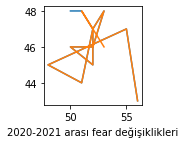

In [15]:
import matplotlib.pyplot as plt
fear2020=[50,51,52,53,52,50,52,52,51,48,55,56]
fear2021=[48,48,47,48,46,46,45,47,44,45,47,43]
fear2022=[53,51,52,53,52,50,52,52,51,48,55,56]
fear2023=[46,48,47,48,46,46,45,47,44,45,47,43]
plt.subplot(2,3,1)
plt.plot(fear2020,fear2021)
plt.subplot(2,3,1)
plt.plot(fear2022,fear2023)
plt.xlabel("2020-2021 arası fear değişiklikleri")
plt.show()